In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
city='austin'

In [3]:
data=pd.read_csv(city+'_bnb.csv')
data.head(), data.info(), data.describe()

# Remove columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Convert price from string to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Print the cleaned data info to check changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15419 non-null  int64  
 1   listing_url                                   15419 non-null  object 
 2   scrape_id                                     15419 non-null  int64  
 3   last_scraped                                  15419 non-null  object 
 4   source                                        15419 non-null  object 
 5   name                                          15419 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         9309 non-null   object 
 8   picture_url                                   15418 non-null  object 
 9   host_id                                       15419 non-null 

In [4]:
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20231215200307,2023-12-16,city scrape,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.89,4.83,4.73,4.79,f,1,1,0,0,3.71
1,5769,https://www.airbnb.com/rooms/5769,20231215200307,2023-12-16,previous scrape,Home in Austin · ★4.91 · 1 bedroom · 1 bed · 1...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.91,4.94,4.76,4.92,f,1,0,1,0,1.76
2,6413,https://www.airbnb.com/rooms/6413,20231215200307,2023-12-16,previous scrape,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.99,4.98,4.87,4.93,f,1,1,0,0,0.70
3,6448,https://www.airbnb.com/rooms/6448,20231215200307,2023-12-16,city scrape,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.99,4.97,4.97,4.89,t,1,1,0,0,2.09
4,8502,https://www.airbnb.com/rooms/8502,20231215200307,2023-12-16,city scrape,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,https://www.airbnb.com/users/show/25298,...,4.84,4.87,4.67,4.60,f,1,1,0,0,0.30


In [5]:
# Group by host_id and count listings, sort by count
popular_hosts = data.groupby('host_id').size().sort_values(ascending=False).head(10)
popular_hosts

host_id
274552333    132
107434423    129
263502162    123
464404919     91
8167447       91
35817561      86
501999514     82
285364413     80
118565935     78
475533011     61
dtype: int64

/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_35836/3699910847.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_35836/3699910847.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


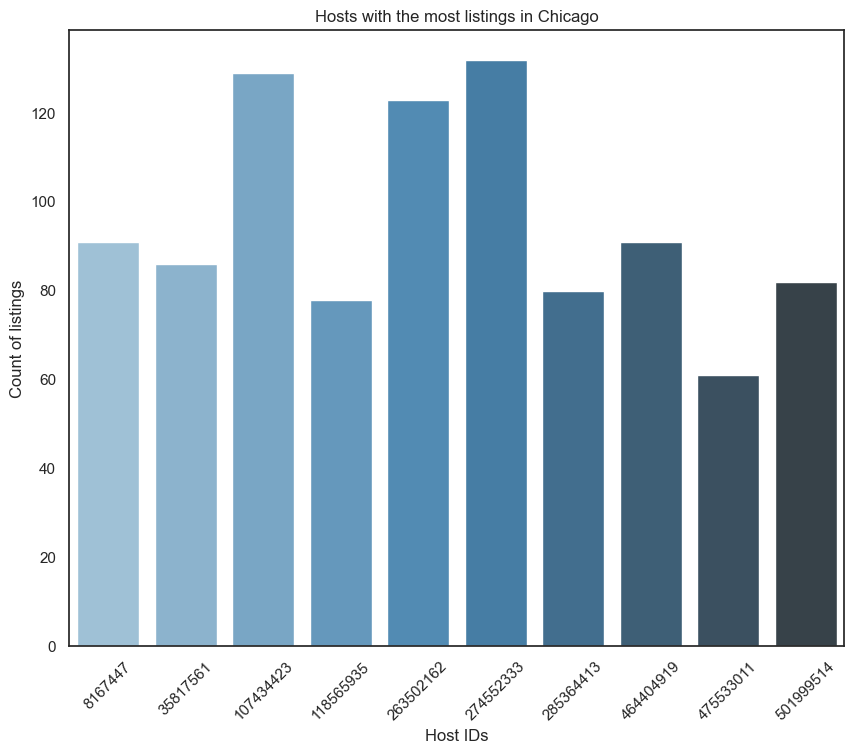

In [6]:
# Prepare data for visualization from earlier top hosts data
top_host_df = pd.DataFrame(popular_hosts).reset_index()
top_host_df.columns = ['Host_ID', 'P_Count']

# Set figure size and style for visualization
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

# Create bar plot to visualize top hosts with the most listings
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Chicago')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Show plot
plt.show()

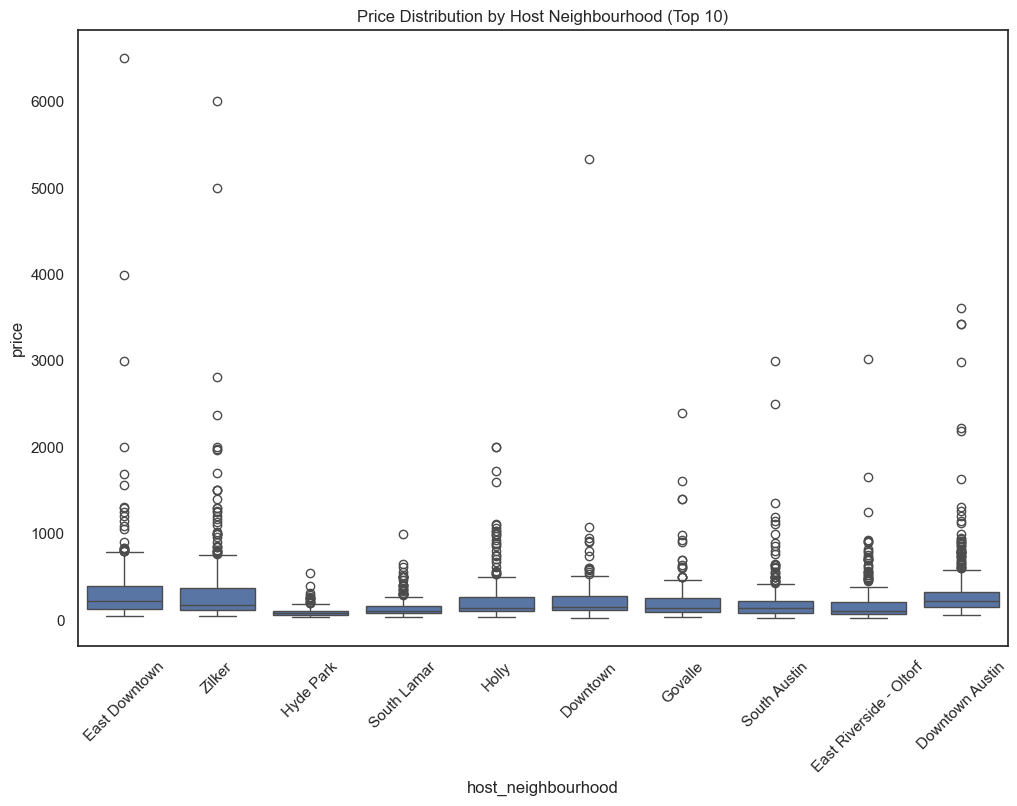

In [7]:
# Identify top 10 neighborhoods based on the number of listings
top_neighborhoods = data['host_neighbourhood'].value_counts().head(10).index

# Filter the data to include only listings from these top 10 neighborhoods
filtered_data = data[data['host_neighbourhood'].isin(top_neighborhoods)]

# Visualize the price distribution for the top 10 neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(x='host_neighbourhood', y='price', data=filtered_data)
plt.title('Price Distribution by Host Neighbourhood (Top 10)')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


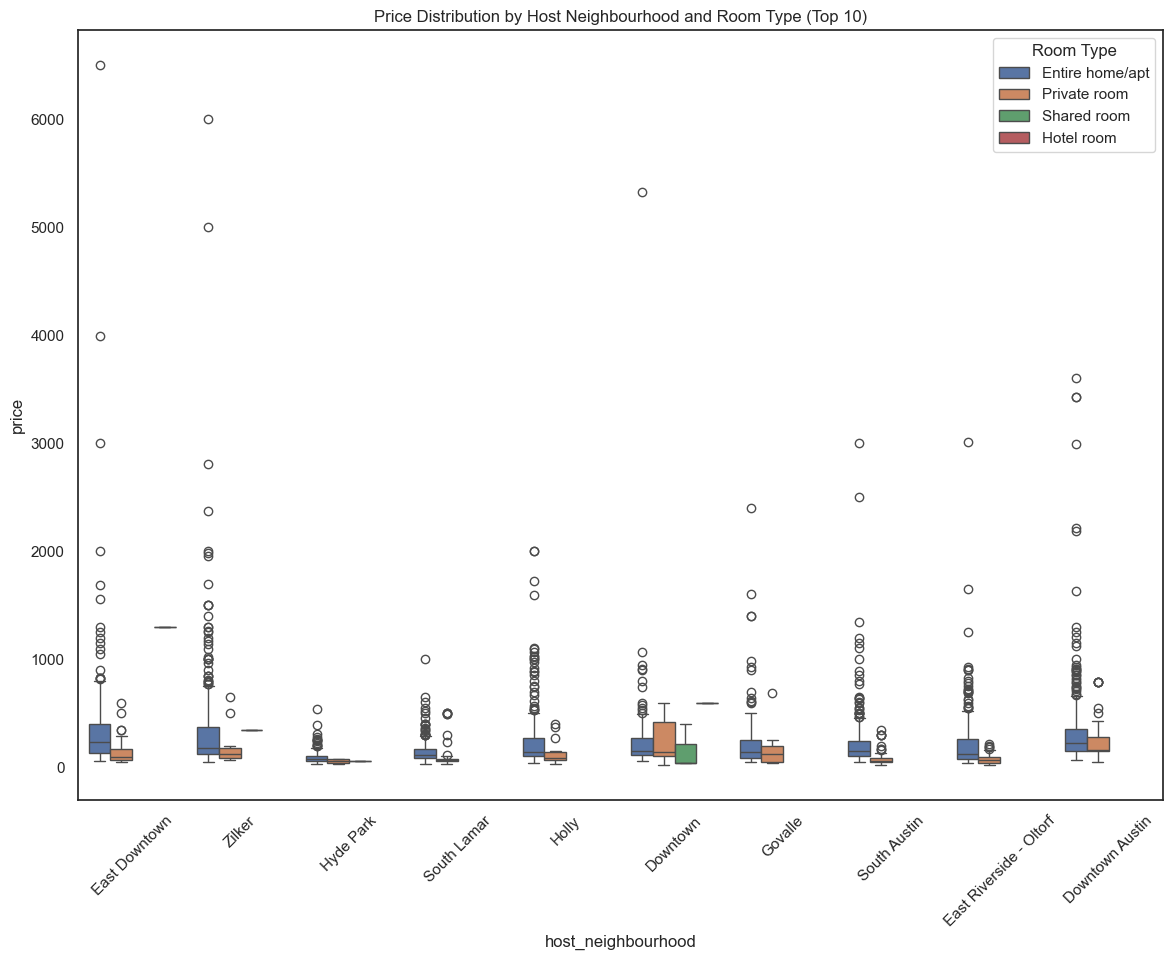

In [8]:
# Set figure size for better visualization
plt.figure(figsize=(14, 10))
sns.boxplot(x='host_neighbourhood', y='price', hue='room_type', data=filtered_data)
plt.title('Price Distribution by Host Neighbourhood and Room Type (Top 10)')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.legend(title='Room Type')
plt.show()


/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_35836/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_35836/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_35836/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_35836/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

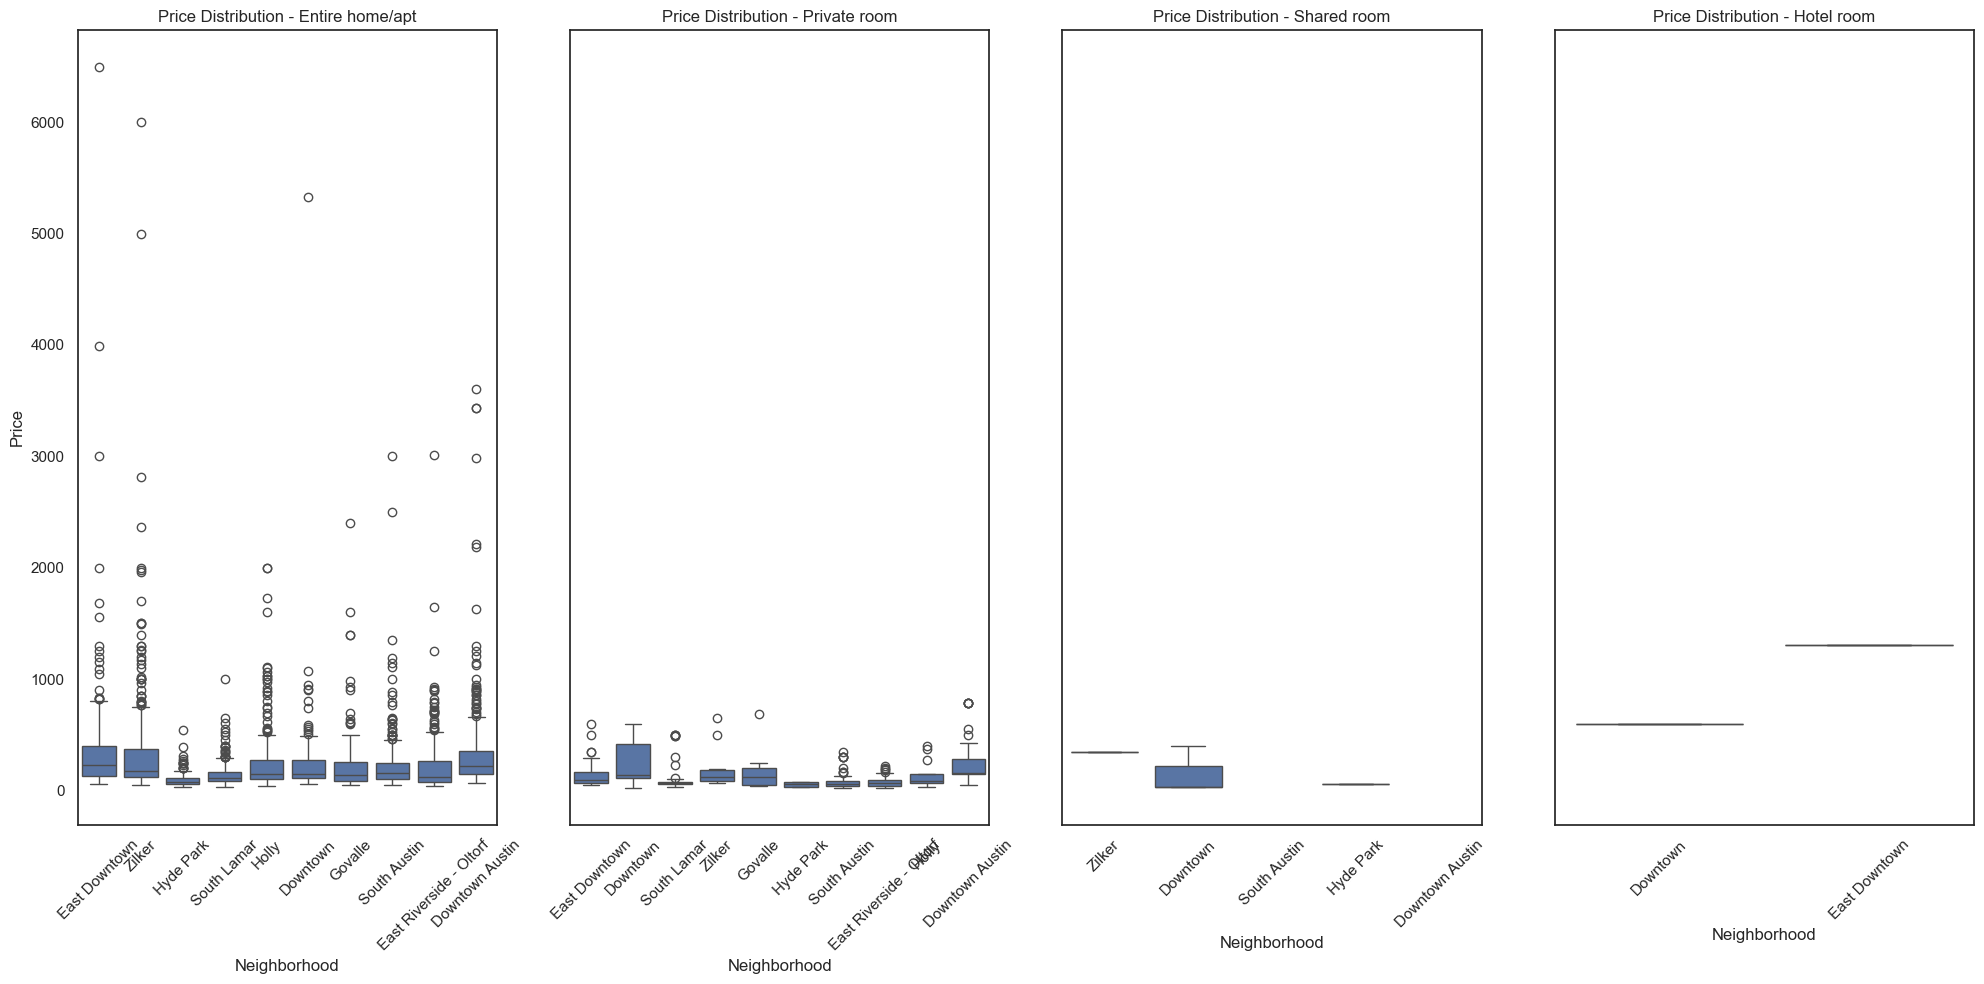

In [9]:
# Set up the figure for multiple subplots
room_types = filtered_data['room_type'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(room_types), figsize=(20, 10), sharey=True)

# Create a boxplot for each room type
for ax, room_type in zip(axes, room_types):
    subset = filtered_data[filtered_data['room_type'] == room_type]
    sns.boxplot(x='host_neighbourhood', y='price', data=subset, ax=ax)
    ax.set_title(f'Price Distribution - {room_type}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Neighborhood')
    ax.set_ylabel('Price')

# Adjust layout for better fit and display plot
plt.tight_layout()
plt.show()

In [10]:
import folium
from folium.plugins import HeatMap

# Create a basic map centered around Chicago
map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Prepare data for the heatmap, removing NaN values
clean_data = data.dropna(subset=['latitude', 'longitude', 'price'])
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in clean_data.iterrows()]

# Add a heatmap layer
HeatMap(heat_data, radius=10, blur=10).add_to(map_chicago)

# Display the map
map_chicago


/Users/sandroamaglobeli/Documents/GitHub/Hackathon24/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
